:Kishan_Rajoria

# Simple Linear Regression (Induction Motor Full Amp Calculation)

What is full load amperage?
Full load amperage (also called full load amps or full load current) is the largest current that a motor is designed to carry under particular conditions. It is simply the motor’s rated current at rated load and voltage conditions.

Subjecting the motor to an input current greater than the full load current causes the motor to produce additional heat, which might end up damaging the electrical motor's windings and insulation.

Full load amperage calculation forms the basis of selecting fuses, cables, circuit breakers, overload relay cables, and other switchgear necessary to protect the motor from damages.

Three phase full load amps calculator
For three-phase AC motors, when the motor power rating is known in kilowatts (kW) , FLA can be calculated as follows:



For three-phase AC motors, when the output power is known in horsepower (hp), FLA can be calculated as follows:

........................................................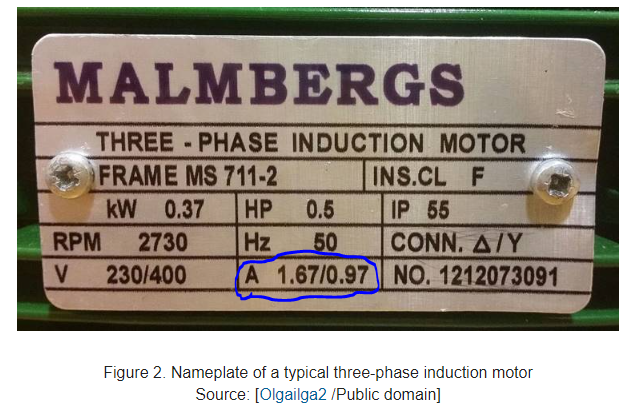........................................................................................

...............................................................................................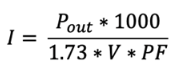...........................................................................................................................................


Where:

P=mechanical power output

PF=Power factor

V=Line Voltage

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

## Importing the dataset

In [2]:
data = pd.read_csv('motor.csv')

## Basic EDA of dataset and checking missing, null, negative values

In [3]:
motor_data =data.copy()

In [4]:
motor_data.info() #check Non-null count and Data type of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   KW       30 non-null     float64
 1   Voltage  30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
motor_data.isnull().sum() #check missing values

KW         0
Voltage    0
dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

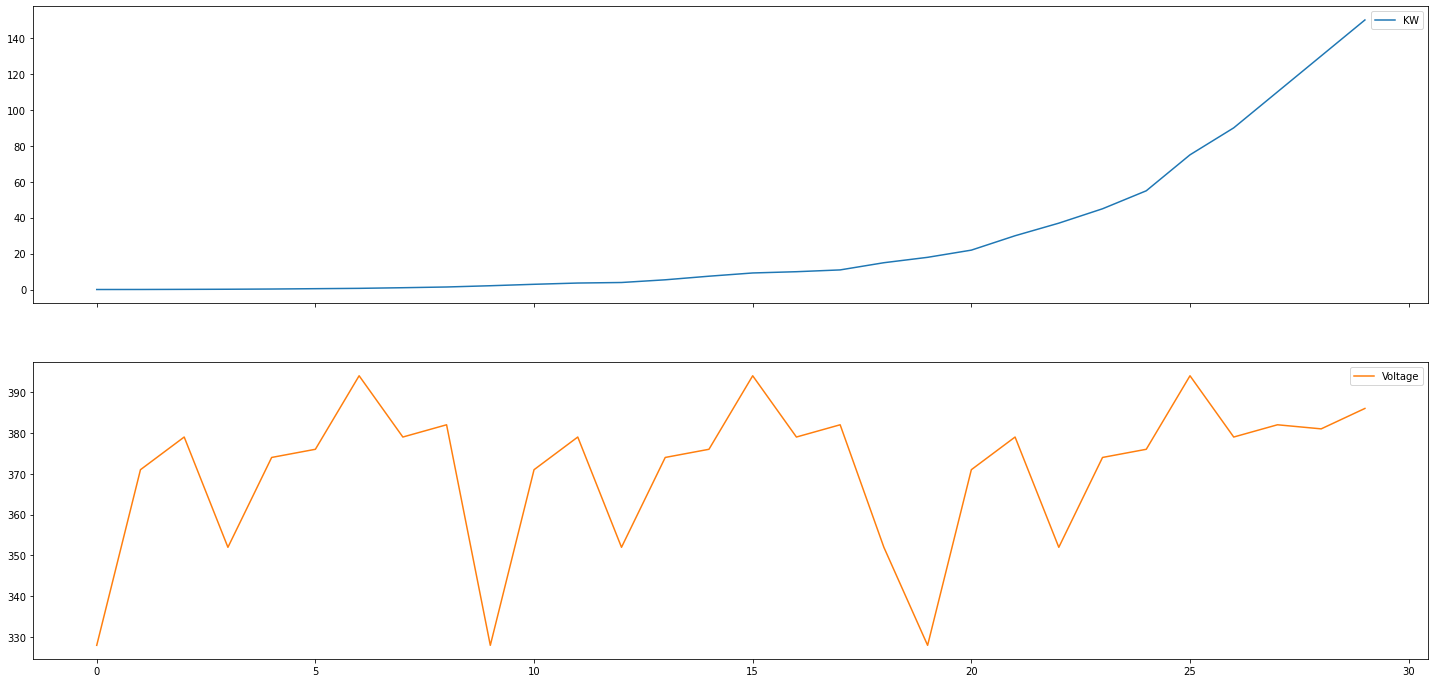

In [6]:
motor_data.plot(subplots=True, figsize=(25,12))

In [7]:
motor_data.describe() #checking total values count, mean, standard deviation, quatile range, min and max values

,KW,Voltage
count,30.000000,30.000000
mean,27.937667,370.800000
std,41.772667,18.336698
min,0.100000,328.000000
25%,1.200000,371.000000
50%,8.400000,376.000000
75%,35.250000,380.500000
max,150.000000,394.000000


In [8]:
motor_data.corr() #checking the correlation of feature with each other

,KW,Voltage
KW,1.000000,0.298353
Voltage,0.298353,1.000000


In [9]:
motor_data.cov() #checking the covarianc matrix

,KW,Voltage
KW,1744.955715,228.530207
Voltage,228.530207,336.234483


In [10]:
motor_data.skew() #check the data skewness

KW         1.782803
Voltage   -1.268650
dtype: float64

<AxesSubplot:>

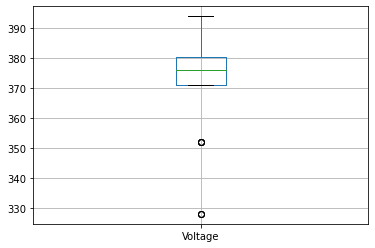

In [11]:
data.boxplot('Voltage')

<AxesSubplot:>

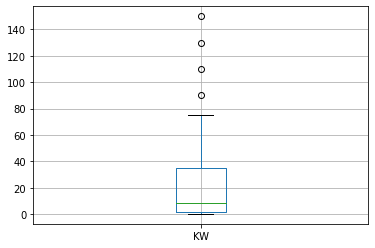

In [12]:
motor_data.boxplot('KW')

## Feature Engineering (calculate full load amperage from the motor data)

In [13]:
motor_data['FLA']=motor_data['KW']*1000/(motor_data['Voltage']*1.73*0.88)

In [42]:
motor_data.head(5)

,KW,FLA
0,0.10,0.200261
1,0.12,0.212461
2,0.18,0.311964
3,0.25,0.466518
4,0.37,0.649832


In [15]:
motor_data=motor_data.drop(['Voltage'],axis=1)

In [16]:
X = motor_data.iloc[:, :-1].values
y = motor_data.iloc[:, -1].values

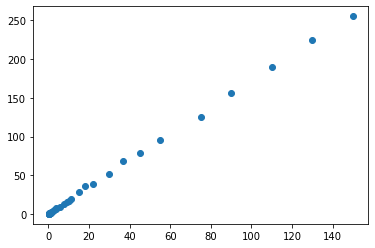

In [17]:
#View the Data
plt.scatter(X,y)

In [18]:
X

array([[1.0e-01],
       [1.2e-01],
       [1.8e-01],
       [2.5e-01],
       [3.7e-01],
       [5.6e-01],
       [7.5e-01],
       [1.1e+00],
       [1.5e+00],
       [2.2e+00],
       [3.0e+00],
       [3.7e+00],
       [4.0e+00],
       [5.5e+00],
       [7.5e+00],
       [9.3e+00],
       [1.0e+01],
       [1.1e+01],
       [1.5e+01],
       [1.8e+01],
       [2.2e+01],
       [3.0e+01],
       [3.7e+01],
       [4.5e+01],
       [5.5e+01],
       [7.5e+01],
       [9.0e+01],
       [1.1e+02],
       [1.3e+02],
       [1.5e+02]])

In [19]:
y

array([2.00261461e-01, 2.12460677e-01, 3.11964028e-01, 4.66518177e-01,
       6.49832378e-01, 9.78298543e-01, 1.25036344e+00, 1.90644684e+00,
       2.57928374e+00, 4.40575215e+00, 5.31151693e+00, 6.41259392e+00,
       7.46429083e+00, 9.65967049e+00, 1.31022126e+01, 1.55045066e+01,
       1.73313349e+01, 1.89147475e+01, 2.79910906e+01, 3.60470630e+01,
       3.89511241e+01, 5.19940047e+01, 6.90446902e+01, 7.90336676e+01,
       9.60828926e+01, 1.25036344e+02, 1.55982014e+02, 1.89147475e+02,
       2.24124638e+02, 2.55255541e+02])

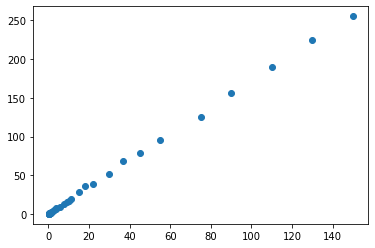

In [20]:
#View the Data
plt.scatter(X,y)

## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [23]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

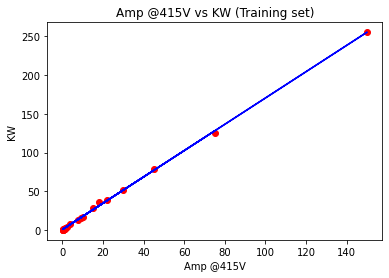

In [24]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Amp @415V vs KW (Training set)')
plt.xlabel('Amp @415V')
plt.ylabel('KW')
plt.show()

## Visualising the Test set results

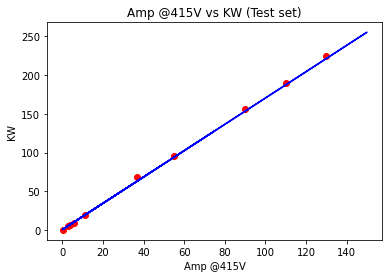

In [25]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Amp @415V vs KW (Test set)')
plt.xlabel('Amp @415V')
plt.ylabel('KW')
plt.show()